In [ ]:
"""
Deep Learning with Keras and Tensorflow
Course-End Project

Home Loan Data Analysis

Problem Statement:
For a safe and secure lending experience, it's important to analyze the past data.
In this project, you have to build a deep learning model to predict the chance of default for
future loans using historical data. As you will see, this dataset is highly imbalanced and
includes a lot of features that make this problem more challenging.

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan
using historical data
Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model

Steps to be done:

1)	Load the dataset that is given to you
2)	Check for null values in the dataset
3)	Print the percentage of default to a payer of the dataset for the TARGET column
4)	Balance the dataset if the data is imbalanced
5)	Plot the balanced or imbalanced data
6)	Encode the columns that are required for the model
7)	Calculate sensitivity as a metric
8)	Calculate the area under the receiver operating characteristics curve
"""

"\nDeep Learning with Keras and Tensorflow\nCourse-End Project\n\nHome Loan Data Analysis\n\nProblem Statement:\nFor a safe and secure lending experience, it's important to analyze the past data.\nIn this project, you have to build a deep learning model to predict the chance of default for\nfuture loans using historical data. As you will see, this dataset is highly imbalanced and\nincludes a lot of features that make this problem more challenging.\n\nObjective: Create a model that predicts whether or not an applicant will be able to repay a loan\nusing historical data\nDomain: Finance\n\nAnalysis to be done: Perform data preprocessing and build a deep learning prediction model\n\nSteps to be done:\n\n1)\tLoad the dataset that is given to you\n2)\tCheck for null values in the dataset\n3)\tPrint the percentage of default to a payer of the dataset for the TARGET column\n4)\tBalance the dataset if the data is imbalanced\n5)\tPlot the balanced or imbalanced data\n6)\tEncode the columns that

In [ ]:
import pandas as pd
import numpy as np
import time

In [ ]:
#1)	Load the dataset that is given to you
data = pd.read_csv("Home_loan_data.csv")

In [ ]:
#2)	Check for null values in the dataset  -- Will do all the EDA required as well

In [ ]:
data.info() # as we can see there are a lot of null values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
(data.iloc[:, :100]).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [ ]:
#lets get those columns that have non-null counts lesser than 307511.
handle_nulls_col_list = []
for col in data.columns:
  if data[col].count()<307511:
    handle_nulls_col_list.append(col)

In [ ]:
handle_nulls_col_list

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

In [ ]:
len(handle_nulls_col_list) #67 cols need null value handling here

67

In [ ]:
data['FLOORSMAX_MEDI'].count()

np.int64(154491)

In [ ]:
#creating a function to cross-check datatypes of null cols
def check_data_type(data, nulls_list: list):
  for col in nulls_list:
    # Check datatype of a column
    if data[col].dtype == 'int64':
        print(f"Column {col} is integer")
    elif data[col].dtype == 'float64':
        print(f"Column {col} is float")
    elif data[col].dtype == 'object':
        print(f"Column {col} is string/object")
    else:
        print(f"Column {col} has dtype: {data[col].dtype}")

In [ ]:
check_data_type(data, handle_nulls_col_list)

Column AMT_ANNUITY is float
Column AMT_GOODS_PRICE is float
Column NAME_TYPE_SUITE is string/object
Column OWN_CAR_AGE is float
Column OCCUPATION_TYPE is string/object
Column CNT_FAM_MEMBERS is float
Column EXT_SOURCE_1 is float
Column EXT_SOURCE_2 is float
Column EXT_SOURCE_3 is float
Column APARTMENTS_AVG is float
Column BASEMENTAREA_AVG is float
Column YEARS_BEGINEXPLUATATION_AVG is float
Column YEARS_BUILD_AVG is float
Column COMMONAREA_AVG is float
Column ELEVATORS_AVG is float
Column ENTRANCES_AVG is float
Column FLOORSMAX_AVG is float
Column FLOORSMIN_AVG is float
Column LANDAREA_AVG is float
Column LIVINGAPARTMENTS_AVG is float
Column LIVINGAREA_AVG is float
Column NONLIVINGAPARTMENTS_AVG is float
Column NONLIVINGAREA_AVG is float
Column APARTMENTS_MODE is float
Column BASEMENTAREA_MODE is float
Column YEARS_BEGINEXPLUATATION_MODE is float
Column YEARS_BUILD_MODE is float
Column COMMONAREA_MODE is float
Column ELEVATORS_MODE is float
Column ENTRANCES_MODE is float
Column FLOORS

In [ ]:
#creating a function to handle null values for given set of cols
def handle_null_in_data(data, nulls_list: list):
  for col in nulls_list:
    # Check datatype of a column
    if data[col].dtype == 'int64':
        data[col].fillna(data[col].median() , inplace=True )
    elif data[col].dtype == 'float64':
        data[col].fillna(data[col].mean() , inplace=True )
    elif data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0] , inplace=True )
    else:
        print(f"Column {col} has dtype: {data[col].dtype}")

In [ ]:
handle_null_in_data(data, handle_nulls_col_list)

/tmp/ipython-input-262139640.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean() , inplace=True )
/tmp/ipython-input-262139640.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
#lets get those columns that have non-null counts lesser than 307511.
for col in data.columns:
  if data[col].count()<307511:
    print(data[col].count())
#since there is no output here we can say all Nulls have been handled.

In [ ]:
(data.iloc[:, :100]).info() #successfully handled the null values as we see no other number other than 307511

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [ ]:
#3)	Print the percentage of default to a payer of the dataset for the TARGET column


In [ ]:
data['TARGET']

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


In [ ]:
data["TARGET"].value_counts()

,count
TARGET,
0,282686
1,24825


In [ ]:
data["TARGET"].value_counts()[0]

np.int64(282686)

In [ ]:
# Count total entries
total = len(data['TARGET'])

# Count defaults ( 0 = default, 1 = paid -> #as per the mapping sheet)
default_count = data["TARGET"].value_counts()[0]

# Calculate percentage
default_percentage = (default_count / total) * 100
payer_percentage = 100 - default_percentage

# Print results
print(f"Default rate: {default_percentage:.2f}%")
print(f"Payer rate: {payer_percentage:.2f}%")

"""
By the below output it is clear that maximum payers are getting defaulted due
to failed repayments to their respective banks.
"""

Default rate: 91.93%
Payer rate: 8.07%


'\nBy the below output it is clear that maximum payers are getting defaulted due\nto failed repayments to their respective banks.\n'

In [ ]:
#4)	Balance the dataset if the data is imbalanced  - using SMOTE

In [ ]:
data["TARGET"].value_counts() #as we can see that the data-set is imbalanced

,count
TARGET,
0,282686
1,24825


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#as there are a huge number of feature columns using drop to get all features
data_feat = data.drop(columns=['TARGET'])

In [ ]:
#fetching all cols that have obj as dtype:
def fetch_all_obj_cols(data_feat: pd.DataFrame)-> list:
  #creating a function to handle null values for given set of cols
  obj_coll_list = []
  for col in data_feat.columns:
    # Check datatype of a column
    if data[col].dtype == 'object':
        obj_coll_list.append(col)
  return obj_coll_list

In [ ]:
#we need to do one-hot-encoding for object dtypes and then return the fearues
from sklearn.preprocessing import OneHotEncoder

def do_ohe(data_feat: pd.DataFrame, obj_cols_list: list) -> pd.DataFrame:
  """
  Creating my own custom function:
  1)It takes the parent pandas df and the list of object feature columns as input.
  2)It iterates over every object-type feature column then converts it into a numpy array,
  does the OHE and generates numpy-OHE-array.
  3)Later this numpy-OHE-array is converted into a pandas df and concatenated to the parent
  pandas df object.
  """
  oheObj = OneHotEncoder(sparse_output=False)
  for col in obj_cols_list:
    #getting the numpy array for the feat_col
    feat_col = data_feat[[col]].values
    #doing the OHE for the feat_col and storing in featOHE
    oheObj.fit(feat_col)
    featOHE = oheObj.transform(feat_col)
    #now need to add this to the parent pandas df and drop the non-ohe col
    data_feat.drop(columns=[col],inplace=True)
    #note featOHE is a np.array so we need col names to concat to pd.dataframe
    name_list=[]
    for i in range(featOHE.shape[1]):
      name_list.append(f"{col}_{i}")
    #creating a new pd.df for the concerned feature numpy array
    feat_ohe_df = pd.DataFrame(featOHE, columns=name_list, index=data_feat.index)
    #concatenating the OHE feature df to the parent pd.df
    data_feat = pd.concat([data_feat, feat_ohe_df], axis=1)
  return data_feat

In [ ]:
obj_col_list = fetch_all_obj_cols(data_feat)

In [ ]:
obj_col_list

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
data_feat.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [ ]:
data_feat = do_ohe(data_feat, obj_col_list)

In [ ]:
data_feat.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'HOUSETYPE_MODE_2', 'WALLSMATERIAL_MODE_0', 'WALLSMATERIAL_MODE_1',
       'WALLSMATERIAL_MODE_2', 'WALLSMATERIAL_MODE_3', 'WALLSMATERIAL_MODE_4',
       'WALLSMATERIAL_MODE_5', 'WALLSMATERIAL_MODE_6', 'EMERGENCYSTATE_MODE_0',
       'EMERGENCYSTATE_MODE_1'],
      dtype='object', length=245)

In [ ]:
#begining the SMOTE technique to balance the dataset
features = data_feat.iloc[:, :]
label = data.iloc[:,[1]]

smoteObject = SMOTE(random_state=1)

resampledFeatures, resampledLabel = smoteObject.fit_resample(features,label)


In [ ]:
resampledDF = pd.concat([resampledFeatures,resampledLabel] , axis =1 )
resampledDF

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_0,WALLSMATERIAL_MODE_1,WALLSMATERIAL_MODE_2,WALLSMATERIAL_MODE_3,WALLSMATERIAL_MODE_4,WALLSMATERIAL_MODE_5,WALLSMATERIAL_MODE_6,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_1,TARGET
0,100002,0,202500.000000,4.065975e+05,24700.500000,3.510000e+05,0.018801,-9461,-637,-3648.000000,...,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.0,1
1,100003,0,270000.000000,1.293502e+06,35698.500000,1.129500e+06,0.003541,-16765,-1188,-1186.000000,...,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0
2,100004,0,67500.000000,1.350000e+05,6750.000000,1.350000e+05,0.010032,-19046,-225,-4260.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,0
3,100006,0,135000.000000,3.126825e+05,29686.500000,2.970000e+05,0.008019,-19005,-3039,-9833.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,0
4,100007,0,121500.000000,5.130000e+05,21865.500000,5.130000e+05,0.028663,-19932,-3038,-4311.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,445959,0,177719.413766,1.800000e+05,9000.000000,1.800000e+05,0.013935,-17162,-719,-2437.085811,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,1
565368,239563,1,225000.000000,6.750000e+05,41458.900015,6.750000e+05,0.012262,-12796,-2765,-4245.629306,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,1
565369,303458,0,113717.272266,4.923957e+05,30646.855129,4.532827e+05,0.009688,-19184,-294,-2906.244223,...,0.270505,0.0,0.0,0.0,0.729495,0.0,0.0,1.0,0.0,1
565370,162032,0,91253.207444,4.027158e+05,31219.167447,3.642494e+05,0.002397,-10971,-922,-3665.499777,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,1


In [ ]:
#Cross-checking if dataset got balanced or not based on the lable colum TARGET
resampledDF['TARGET'].value_counts()


,count
TARGET,
1,282686
0,282686


In [ ]:
"""
Equal values signifies that the dataset is now balanced
"""

'\nEqual values signifies that the dataset is now balanced\n'

In [ ]:
#5)	Plot the balanced or imbalanced data

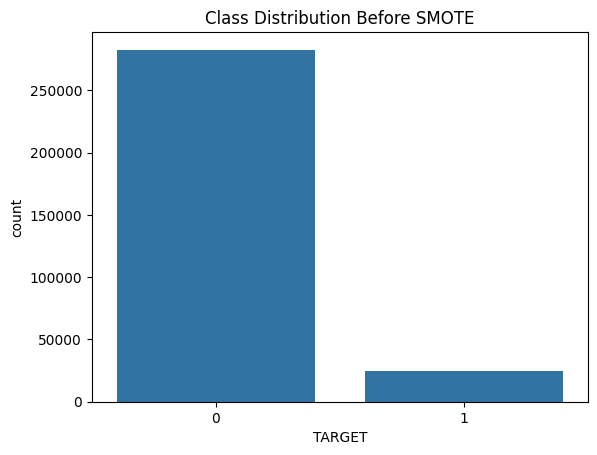

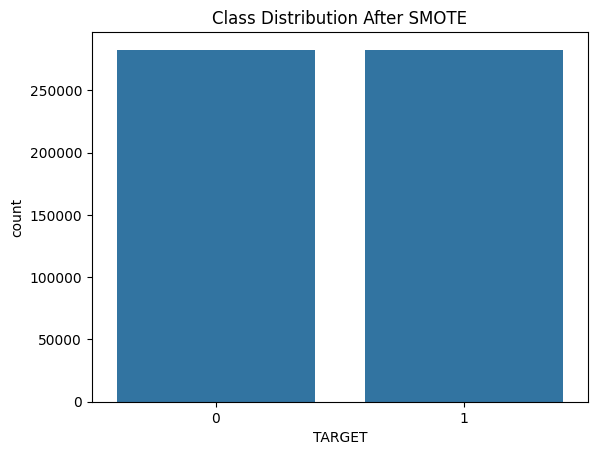

'\nIt can be seen clearly that SMOTE Helped to balance the dataset\n'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
sns.countplot(x='TARGET', data=data)
plt.title("Class Distribution Before SMOTE")
plt.show()

# After SMOTE
sns.countplot(x='TARGET', data=resampledDF)
plt.title("Class Distribution After SMOTE")
plt.show()

"""
It can be seen clearly that SMOTE Helped to balance the dataset
"""

In [ ]:
#6)	Encode the columns that are required for the model

In [ ]:
#Starting the model-building process from here:

In [ ]:
#Note - Here the the label colum "TARGET" is a discreet Numerical data having 0s and 1s
#This is a supervised and classification problem for the model.

In [ ]:
resampledDF.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'WALLSMATERIAL_MODE_0', 'WALLSMATERIAL_MODE_1', 'WALLSMATERIAL_MODE_2',
       'WALLSMATERIAL_MODE_3', 'WALLSMATERIAL_MODE_4', 'WALLSMATERIAL_MODE_5',
       'WALLSMATERIAL_MODE_6', 'EMERGENCYSTATE_MODE_0',
       'EMERGENCYSTATE_MODE_1', 'TARGET'],
      dtype='object', length=246)

In [ ]:
label = resampledDF[['TARGET']].values

In [ ]:
features = resampledDF.iloc[:, :-1].values

In [ ]:
label

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
features

array([[1.00002000e+05, 0.00000000e+00, 2.02500000e+05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00003000e+05, 0.00000000e+00, 2.70000000e+05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00004000e+05, 0.00000000e+00, 6.75000000e+04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.03458000e+05, 0.00000000e+00, 1.13717272e+05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.62032000e+05, 0.00000000e+00, 9.12532074e+04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.15523000e+05, 0.00000000e+00, 1.14141679e+05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
import copy

In [ ]:
unscaled_features = copy.deepcopy(features)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

In [ ]:
#Label Normalization
# Here data is by default 0 and 1, no changes required  --This is binary classification

In [ ]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=10)

In [ ]:
features.shape[1] #number of inputs for the ANN

245

In [ ]:
import tensorflow as tf

In [ ]:
#Model Building, constructing the ANN for the binary classification problem
model = tf.keras.Sequential()
"""Input and Hidden Layer :
Using relu as activation func to avoid the 'Vanishing Gradient Problem'"""
model.add(tf.keras.layers.Dense(units=245, activation="relu",input_shape=(245,)))
model.add(tf.keras.layers.Dense(units=735, activation="relu"))
model.add(tf.keras.layers.Dense(units=1470, activation="relu"))
model.add(tf.keras.layers.Dense(units=735, activation="relu"))
model.add(tf.keras.layers.Dense(units=245, activation="relu"))
"""OutputLayer : using sigmoid as number of units is 1 and it is a binary classification
problem"""
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#For Classification
#
# 1. Binary Classification ---- binary_crossentropy
# 2. MultiClass Classification --- categorical_crossentropy | sparse_categorical_crossentropy
"""
using accuracy metrics as we converted the imbalanced dataset into a balanced one in EDA
using adam optimizer to achieve a converging model"""
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
class MyCLRuleMonitor(tf.keras.callbacks.Callback):
  def __init__(self,CL):
    super(MyCLRuleMonitor,self).__init__()
    self.CL = CL


  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']

    if testScore > trainScore and testScore >= self.CL:
      self.model.stop_training = True

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs = 10, callbacks=[MyCLRuleMonitor(0.85)])

Epoch 1/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - accuracy: 0.8513 - loss: 0.3416 - val_accuracy: 0.9017 - val_loss: 0.2412


In [ ]:
"""
As we can see the model is having a very good val_accuracy so for CL=0.85 this model is a pass model

Only down-side is that this has been built using all 121 features ( 245 after OHE ) , which means to get
a prediction the user would need to enter 121 different parameters which can be tiresome.
"""

'\nAs we can see the model is having a very good val_accuracy so for CL=0.85 this model is a pass model\n\nOnly down-side is that this has been built using all 121 features ( 245 after OHE ) , which means to get\na prediction the user would need to enter 121 different parameters which can be tiresome.\n'

In [ ]:
#7)	Calculate sensitivity as a metric

In [ ]:
"""
To get the sensitivity metric we need both y_true( ground-truth ) and y_pred ( model predictions)

y_true is basically the label array
y_pred can be calcualted using features numpy array - model.preidct(features)
"""
y_true = label
y_pred = model.predict(features)

17668/17668 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step


In [ ]:
y_true

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y_pred

array([[0.56787384],
       [0.04278999],
       [0.03880761],
       ...,
       [1.        ],
       [0.819569  ],
       [0.9987956 ]], dtype=float32)

In [ ]:
"""
As we have used sigmoid function in the output layer y_pred has decimal values in it.
These decimal values are probablities . To calculate the sensitivity we would need discrete
values like 1 or 0.
"""
y_pred_dc = (y_pred >= 0.5).astype(int)

In [ ]:
y_pred_dc

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
"""
Using the confusion matrix we can get true-positive, fals-positive, false-negative
and true positivie values

After that its just sensitivity calculation using the formula = tp / (tp + fn)
"""
from sklearn.metrics import confusion_matrix

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_dc).ravel()

# Sensitivity calculation
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

Sensitivity: 0.85


In [ ]:
f"""
A sensitivity of {sensitivity} means that the model correctly identifies {sensitivity*100}% of the actual positive cases.

We can think of “Default” as the positive class (since it’s the majority and the critical event we
want to detect)
Out of all borrowers who truly defaulted (91.93% of the population), the model correctly identified
{sensitivity*100}% of them as defaulters.
The remaining {100 - sensitivity*100}% of defaulters were missed (the model incorrectly predicted them as payers).
"""

'\nA sensitivity of 0.8500173337200994 means that the model correctly identifies 85.00173337200994% of the actual positive cases.\n\nWe can think of “Default” as the positive class (since it’s the majority and the critical event we\nwant to detect)\nOut of all borrowers who truly defaulted (91.93% of the population), the model correctly identified\n85.00173337200994% of them as defaulters.\nThe remaining 14.998266627990063% of defaulters were missed (the model incorrectly predicted them as payers).\n'

In [ ]:
confusion_matrix(y_true, y_pred_dc)

array([[272446,  10240],
       [ 42398, 240288]])

In [ ]:
"""
To cross check other values
"""

array_1= [tn, fp, fn, tp]
array_1

[np.int64(272446), np.int64(10240), np.int64(42398), np.int64(240288)]

In [ ]:
#8)	Calculate the area under the receiver operating characteristics curve

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

AUC: 0.96


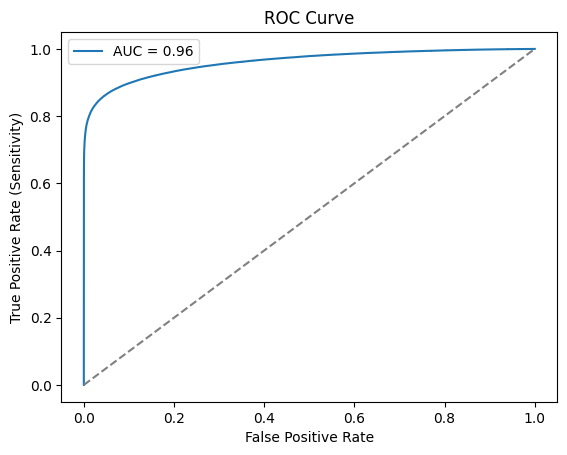

In [ ]:
auc = roc_auc_score(y_true, y_pred)
print(f"AUC: {auc:.2f}")
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
f"""
An AUC of {auc} means the model has very strong discriminative ability

The model has a {auc*100}% chance of ranking a randomly chosen defaulter
higher than a randomly chosen payer.
"""

'\nAn AUC of 0.9610064121815775 means the model has very strong discriminative ability\n\nThe model has a 96.10064121815775% chance of ranking a randomly chosen defaulter\nhigher than a randomly chosen payer.\n'

In [ ]:
"""
The project is completed, further improvements can be to do feature engineering
to eliminate less influencing columns and to get an even better model (CL>=0.95)
"""

'\nThe project is completd, further improvements can be to do feature engineering\nto eliminate less influencing columns and to get an even better model (CL>=0.95)\n'

In [ ]:
"""
Enhancement process starts here - using SFM feature elimination technique to select important
features only
"""

'\nEnhancement process starts here - using SFM feature elimination technique to select important\nfeatures only\n'

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelAlgo = RandomForestClassifier(n_estimators=200, random_state=42)
selectFeatures = SelectFromModel(estimator=modelAlgo)

In [ ]:
#using unscaled features for feature elimination
finalFeatures = selectFeatures.fit_transform(unscaled_features,label)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
selectFeatures.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,

In [ ]:
finalFeatures

array([[1.00002000e+05, 2.02500000e+05, 4.06597500e+05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00003000e+05, 2.70000000e+05, 1.29350250e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00004000e+05, 6.75000000e+04, 1.35000000e+05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.03458000e+05, 1.13717272e+05, 4.92395662e+05, ...,
        2.70504948e-01, 7.29495052e-01, 0.00000000e+00],
       [1.62032000e+05, 9.12532074e+04, 4.02715791e+05, ...,
        9.44301891e-01, 1.00000000e+00, 0.00000000e+00],
       [1.15523000e+05, 1.14141679e+05, 8.11900524e+05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
finalFeatures.shape[1]
#Number of features reduced from 245 to 71 as per SFM feature elimination technique

71

In [ ]:
"""
Now that we have the new-set of features, lets build a new model using these features
"""

'\nNow that we have the new-set of features, lets build a new model using these features\n'

In [ ]:
#scaling the features before model building
sc = StandardScaler()
finalFeatures = sc.fit_transform(finalFeatures)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(finalFeatures,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=10)

In [ ]:
#Model Building, constructing the ANN for the binary classification problem
model2 = tf.keras.Sequential()
"""Input and Hidden Layer :
Using relu as activation func to avoid the 'Vanishing Gradient Problem'"""
model2.add(tf.keras.layers.Dense(units=finalFeatures.shape[1], activation="relu",input_shape=(finalFeatures.shape[1],)))
model2.add(tf.keras.layers.Dense(units=finalFeatures.shape[1]*3, activation="relu"))
model2.add(tf.keras.layers.Dense(units=finalFeatures.shape[1]*6, activation="relu"))
model2.add(tf.keras.layers.Dense(units=finalFeatures.shape[1]*3, activation="relu"))
model2.add(tf.keras.layers.Dense(units=finalFeatures.shape[1], activation="relu"))
"""OutputLayer : using sigmoid as number of units is 1 and it is a binary classification
problem"""
model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#For Classification
#
# 1. Binary Classification ---- binary_crossentropy
# 2. MultiClass Classification --- categorical_crossentropy | sparse_categorical_crossentropy
"""
using accuracy metrics as we converted the imbalanced dataset into a balanced one in EDA
using adam optimizer to achieve a converging model"""
model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
class MyCLRuleMonitor(tf.keras.callbacks.Callback):
  def __init__(self,CL):
    super(MyCLRuleMonitor,self).__init__()
    self.CL = CL


  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']

    if testScore > trainScore and testScore >= self.CL:
      self.model.stop_training = True

In [ ]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test), epochs = 10, callbacks=[MyCLRuleMonitor(0.85)])

Epoch 1/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.8160 - loss: 0.3921 - val_accuracy: 0.8828 - val_loss: 0.2735


In [ ]:
"""
The val_accuracy when using 71 features is lesser as compared to when using all 245 features.
This means there is no need to do feature elimination as we did not get a better model.
"""

'\nThe val_accuracy when using 71 features is lesser as compared to when using all 245 features.\nThis means there is no need to do feature elimination as we did not get a better model.\n'

In [ ]:
#7)	Calculate sensitivity as a metric

In [ ]:
"""
To get the sensitivity metric we need both y_true( ground-truth ) and y_pred ( model predictions)

y_true is basically the label array
y_pred can be calcualted using features numpy array - model.preidct(features)
"""
y_true2 = label
y_pred2 = model2.predict(finalFeatures)

17668/17668 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step


In [ ]:
y_true2

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y_pred2

array([[0.26542434],
       [0.03739015],
       [0.06312976],
       ...,
       [0.9999999 ],
       [0.7359393 ],
       [0.9911465 ]], dtype=float32)

In [ ]:
"""
As we have used sigmoid function in the output layer y_pred2 has decimal values in it.
These decimal values are probablities . To calculate the sensitivity we would need discrete
values like 1 or 0.
"""
y_pred_dc2 = (y_pred2 >= 0.5).astype(int)

In [ ]:
y_pred_dc2

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
"""
Using the confusion matrix we can get true-positive, fals-positive, false-negative
and true positivie values

After that its just sensitivity calculation using the formula = tp / (tp + fn)
"""
#from sklearn.metrics import confusion_matrix

# Confusion matrix
tn2, fp2, fn2, tp2 = confusion_matrix(y_true2, y_pred_dc2).ravel()

# Sensitivity calculation
sensitivity2 = tp2 / (tp2 + fn2)
print(f"Sensitivity: {sensitivity2:.2f}")

Sensitivity: 0.81


In [ ]:
f"""For model2
A sensitivity of {sensitivity2} means that the model correctly identifies {sensitivity2*100}% of the actual positive cases.

We can think of “Default” as the positive class (since it’s the majority and the critical event we
want to detect)
Out of all borrowers who truly defaulted (91.93% of the population), the model correctly identified
{sensitivity2*100}% of them as defaulters.
The remaining {100 - sensitivity2*100}% of defaulters were missed (the model incorrectly predicted them as payers).
"""

'For model2\nA sensitivity of 0.8070580078249365 means that the model correctly identifies 80.70580078249365% of the actual positive cases.\n\nWe can think of “Default” as the positive class (since it’s the majority and the critical event we\nwant to detect)\nOut of all borrowers who truly defaulted (91.93% of the population), the model correctly identified\n80.70580078249365% of them as defaulters.\nThe remaining 19.294199217506346% of defaulters were missed (the model incorrectly predicted them as payers).\n'

In [ ]:
"""
The sensitivty of model2 is lesser than model that we built using all features , this means the first
model is a better model
"""

In [ ]:
confusion_matrix(y_true2, y_pred_dc2)

array([[272420,  10266],
       [ 54542, 228144]])

In [ ]:
"""
To cross check other values
"""

array_1= [tn2, fp2, fn2, tp2]
array_1

[np.int64(272420), np.int64(10266), np.int64(54542), np.int64(228144)]

In [ ]:
#8)	Calculate the area under the receiver operating characteristics curve

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

AUC: 0.95


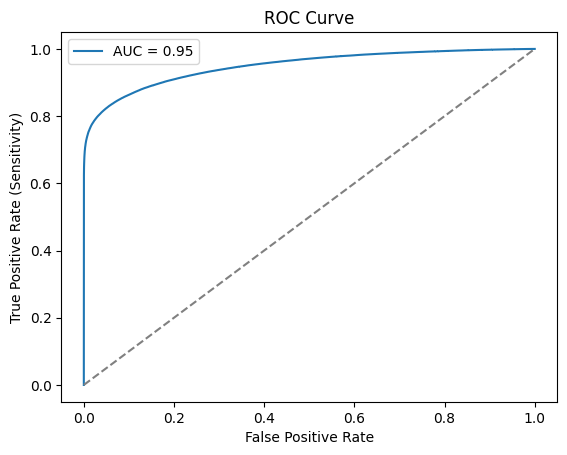

In [ ]:
auc2 = roc_auc_score(y_true2, y_pred2)
print(f"AUC: {auc2:.2f}")
# Plot ROC curve
fpr2, tpr2, thresholds2 = roc_curve(y_true2, y_pred2)
plt.plot(fpr2, tpr2, label=f"AUC = {auc2:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
f"""For model2
An AUC of {auc2} means the model has very strong discriminative ability

The model has a {auc2*100}% chance of ranking a randomly chosen defaulter
higher than a randomly chosen payer.
"""

'For model2\nAn AUC of 0.9485520794469504 means the model has very strong discriminative ability\n\nThe model has a 94.85520794469504% chance of ranking a randomly chosen defaulter\nhigher than a randomly chosen payer.\n'

In [ ]:
"""
AUC of the first model is also more than the model2, again indicating that the first model is the best
one.
"""

'\nAUC of the first model is also more than the model2, again indicating that the first model is the best\none.\n'